In [1]:
#import dependencies
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
# Read the CSV file into a Pandas DataFrame
cvd_df=pd.read_csv("Framingham_clean.csv")

# Review the DataFrame
cvd_df.head()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [3]:

cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex_Male                    3658 non-null   int64  
 1   Age                         3658 non-null   int64  
 2   Education                   3658 non-null   int64  
 3   Current_Smoker              3658 non-null   int64  
 4   Cigarettes_Per_Day          3658 non-null   int64  
 5   Blood_Pressure_Medications  3658 non-null   int64  
 6   Prevalent_Stroke            3658 non-null   int64  
 7   Prevalent_Hypertension      3658 non-null   int64  
 8   Diabetes                    3658 non-null   int64  
 9   Total_Cholesterol           3658 non-null   int64  
 10  Systolic_Blood_Pressure     3658 non-null   float64
 11  Diastolic_Blood_Pressure    3658 non-null   float64
 12  BMI                         3658 non-null   float64
 13  Heart_Rate                  3658 

In [4]:
cvd_df.isnull().sum()

Sex_Male                      0
Age                           0
Education                     0
Current_Smoker                0
Cigarettes_Per_Day            0
Blood_Pressure_Medications    0
Prevalent_Stroke              0
Prevalent_Hypertension        0
Diabetes                      0
Total_Cholesterol             0
Systolic_Blood_Pressure       0
Diastolic_Blood_Pressure      0
BMI                           0
Heart_Rate                    0
Glucose                       0
TenYearCHD                    0
dtype: int64

In [5]:
cvd_df.shape

(3658, 16)

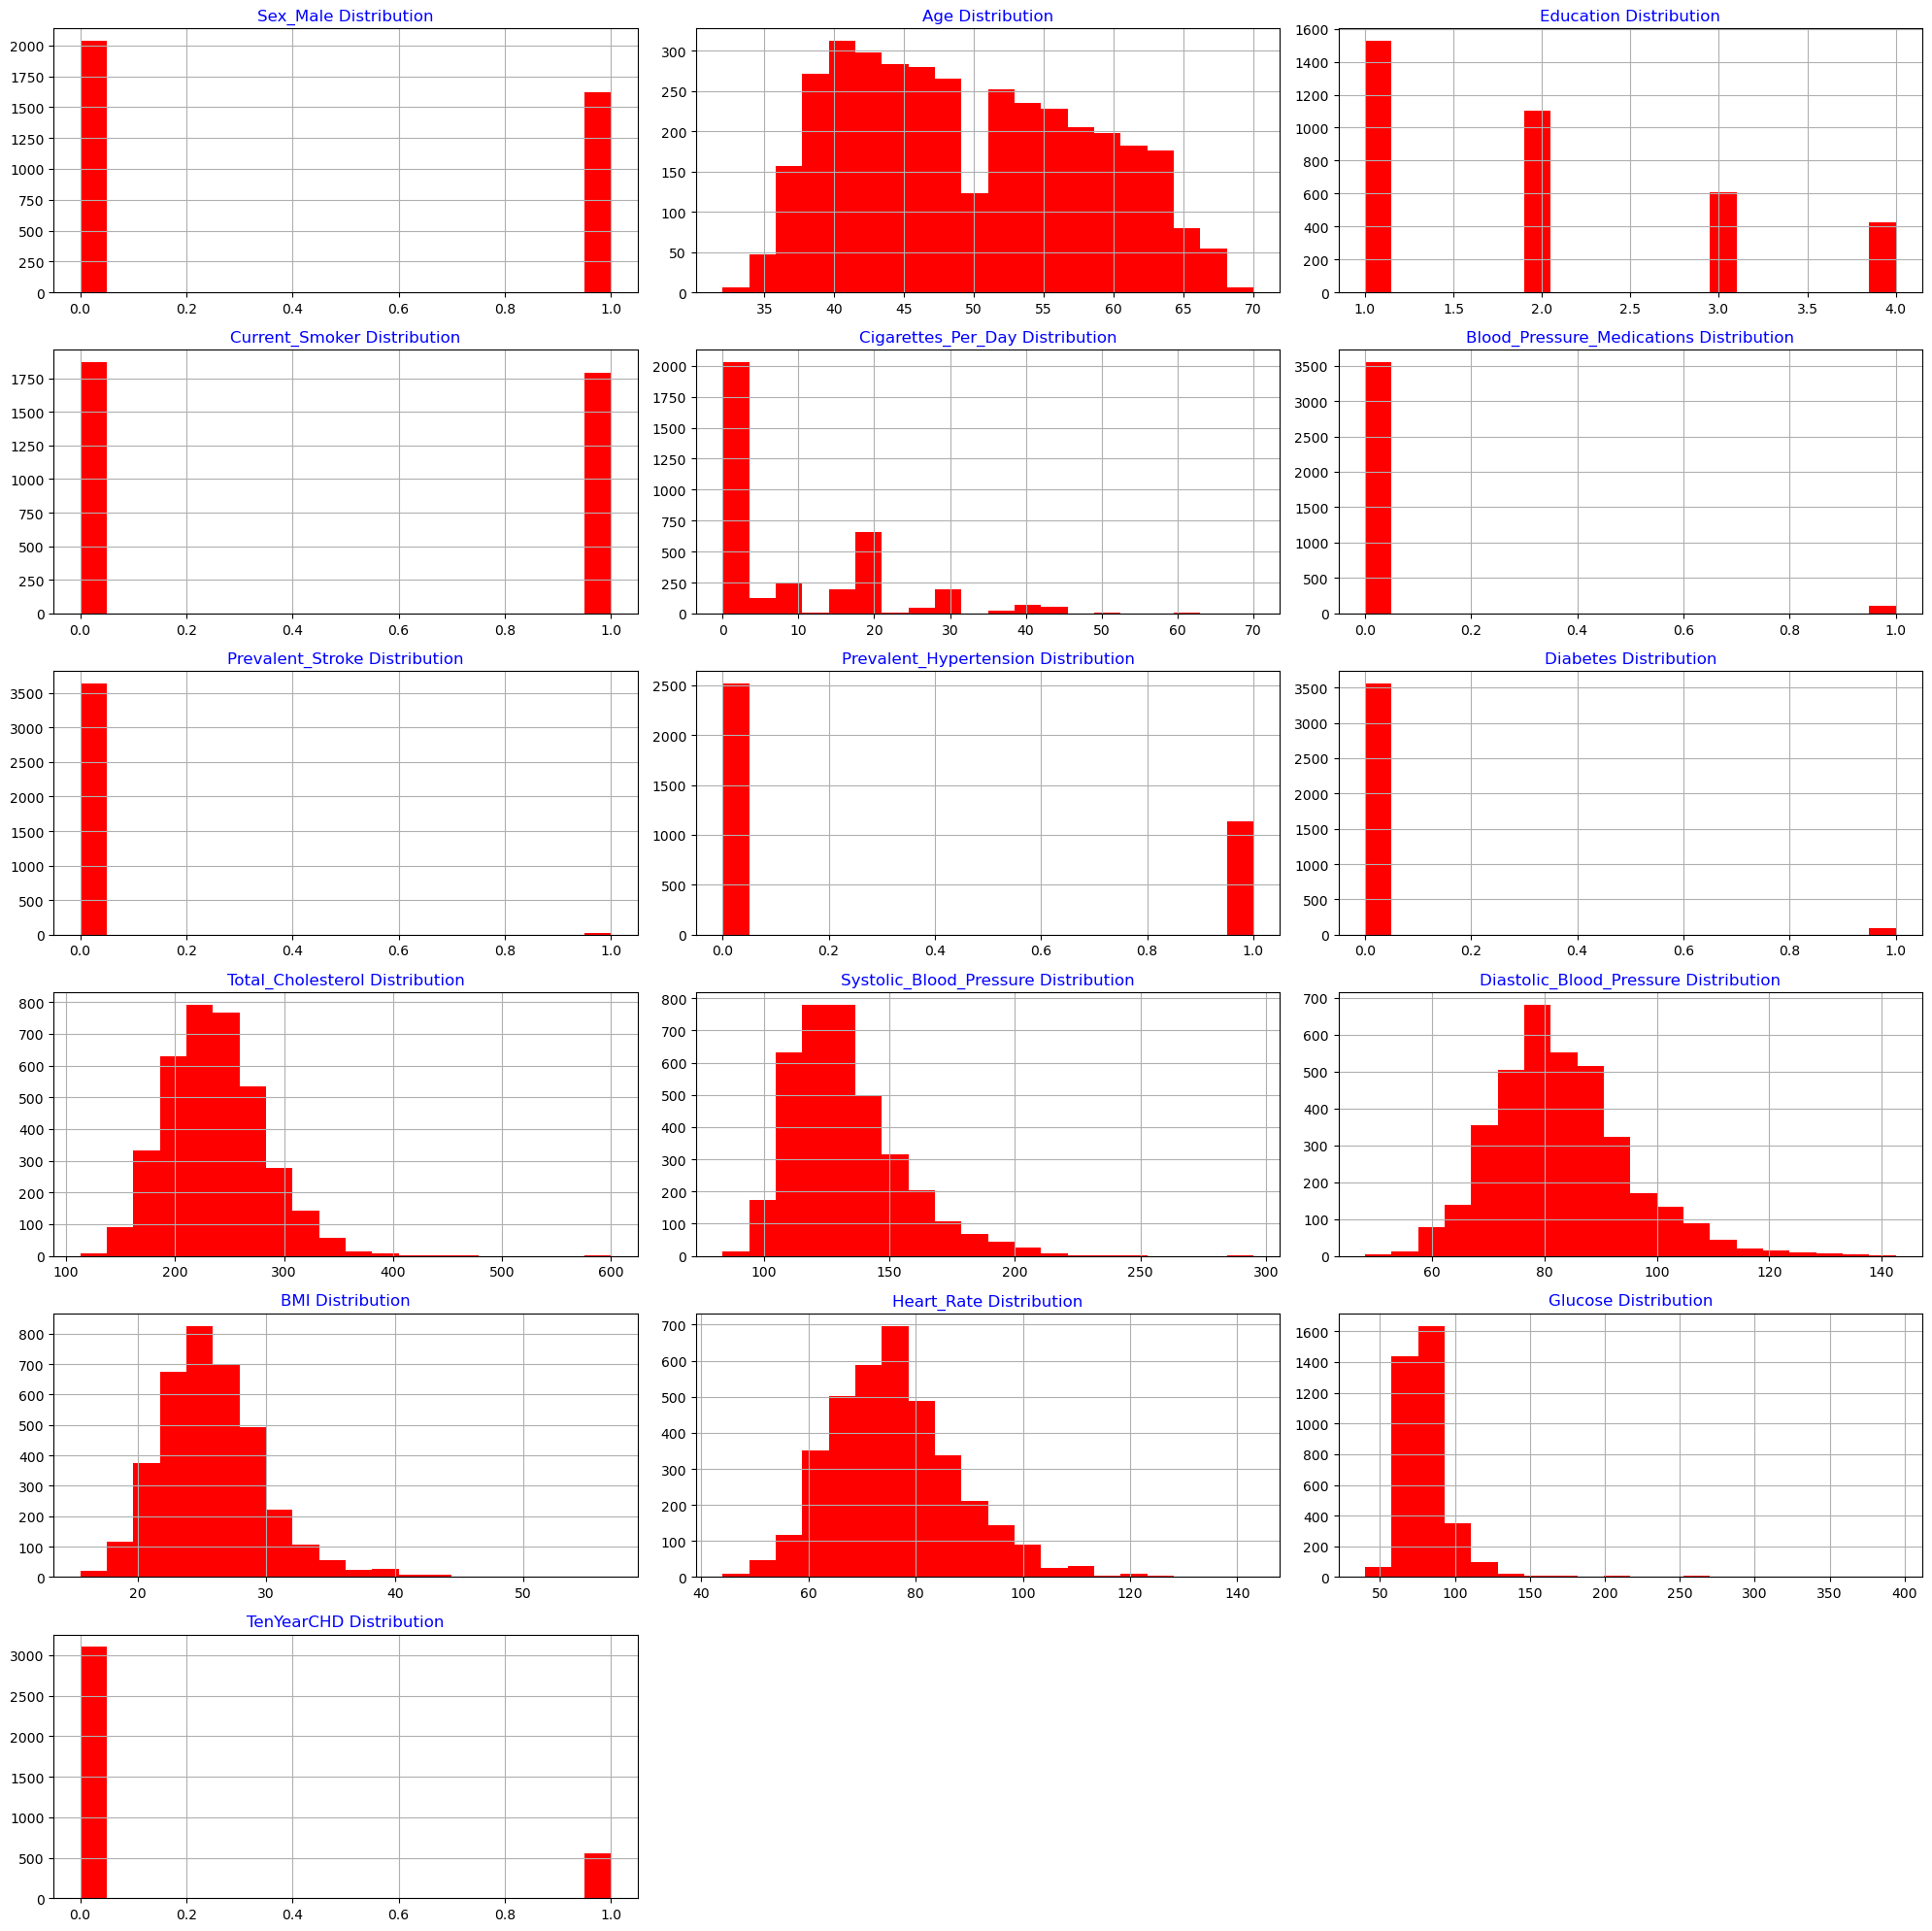

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+" Distribution",color='blue')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(cvd_df,cvd_df.columns,6,3)

In [7]:
cvd_df.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

<AxesSubplot: xlabel='TenYearCHD', ylabel='count'>

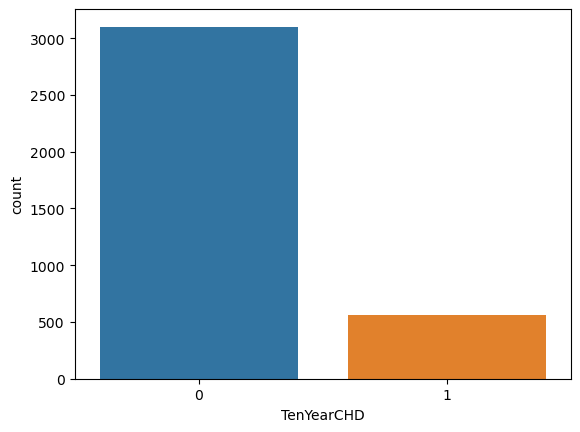

In [8]:

sn.countplot(x='TenYearCHD',data=cvd_df)

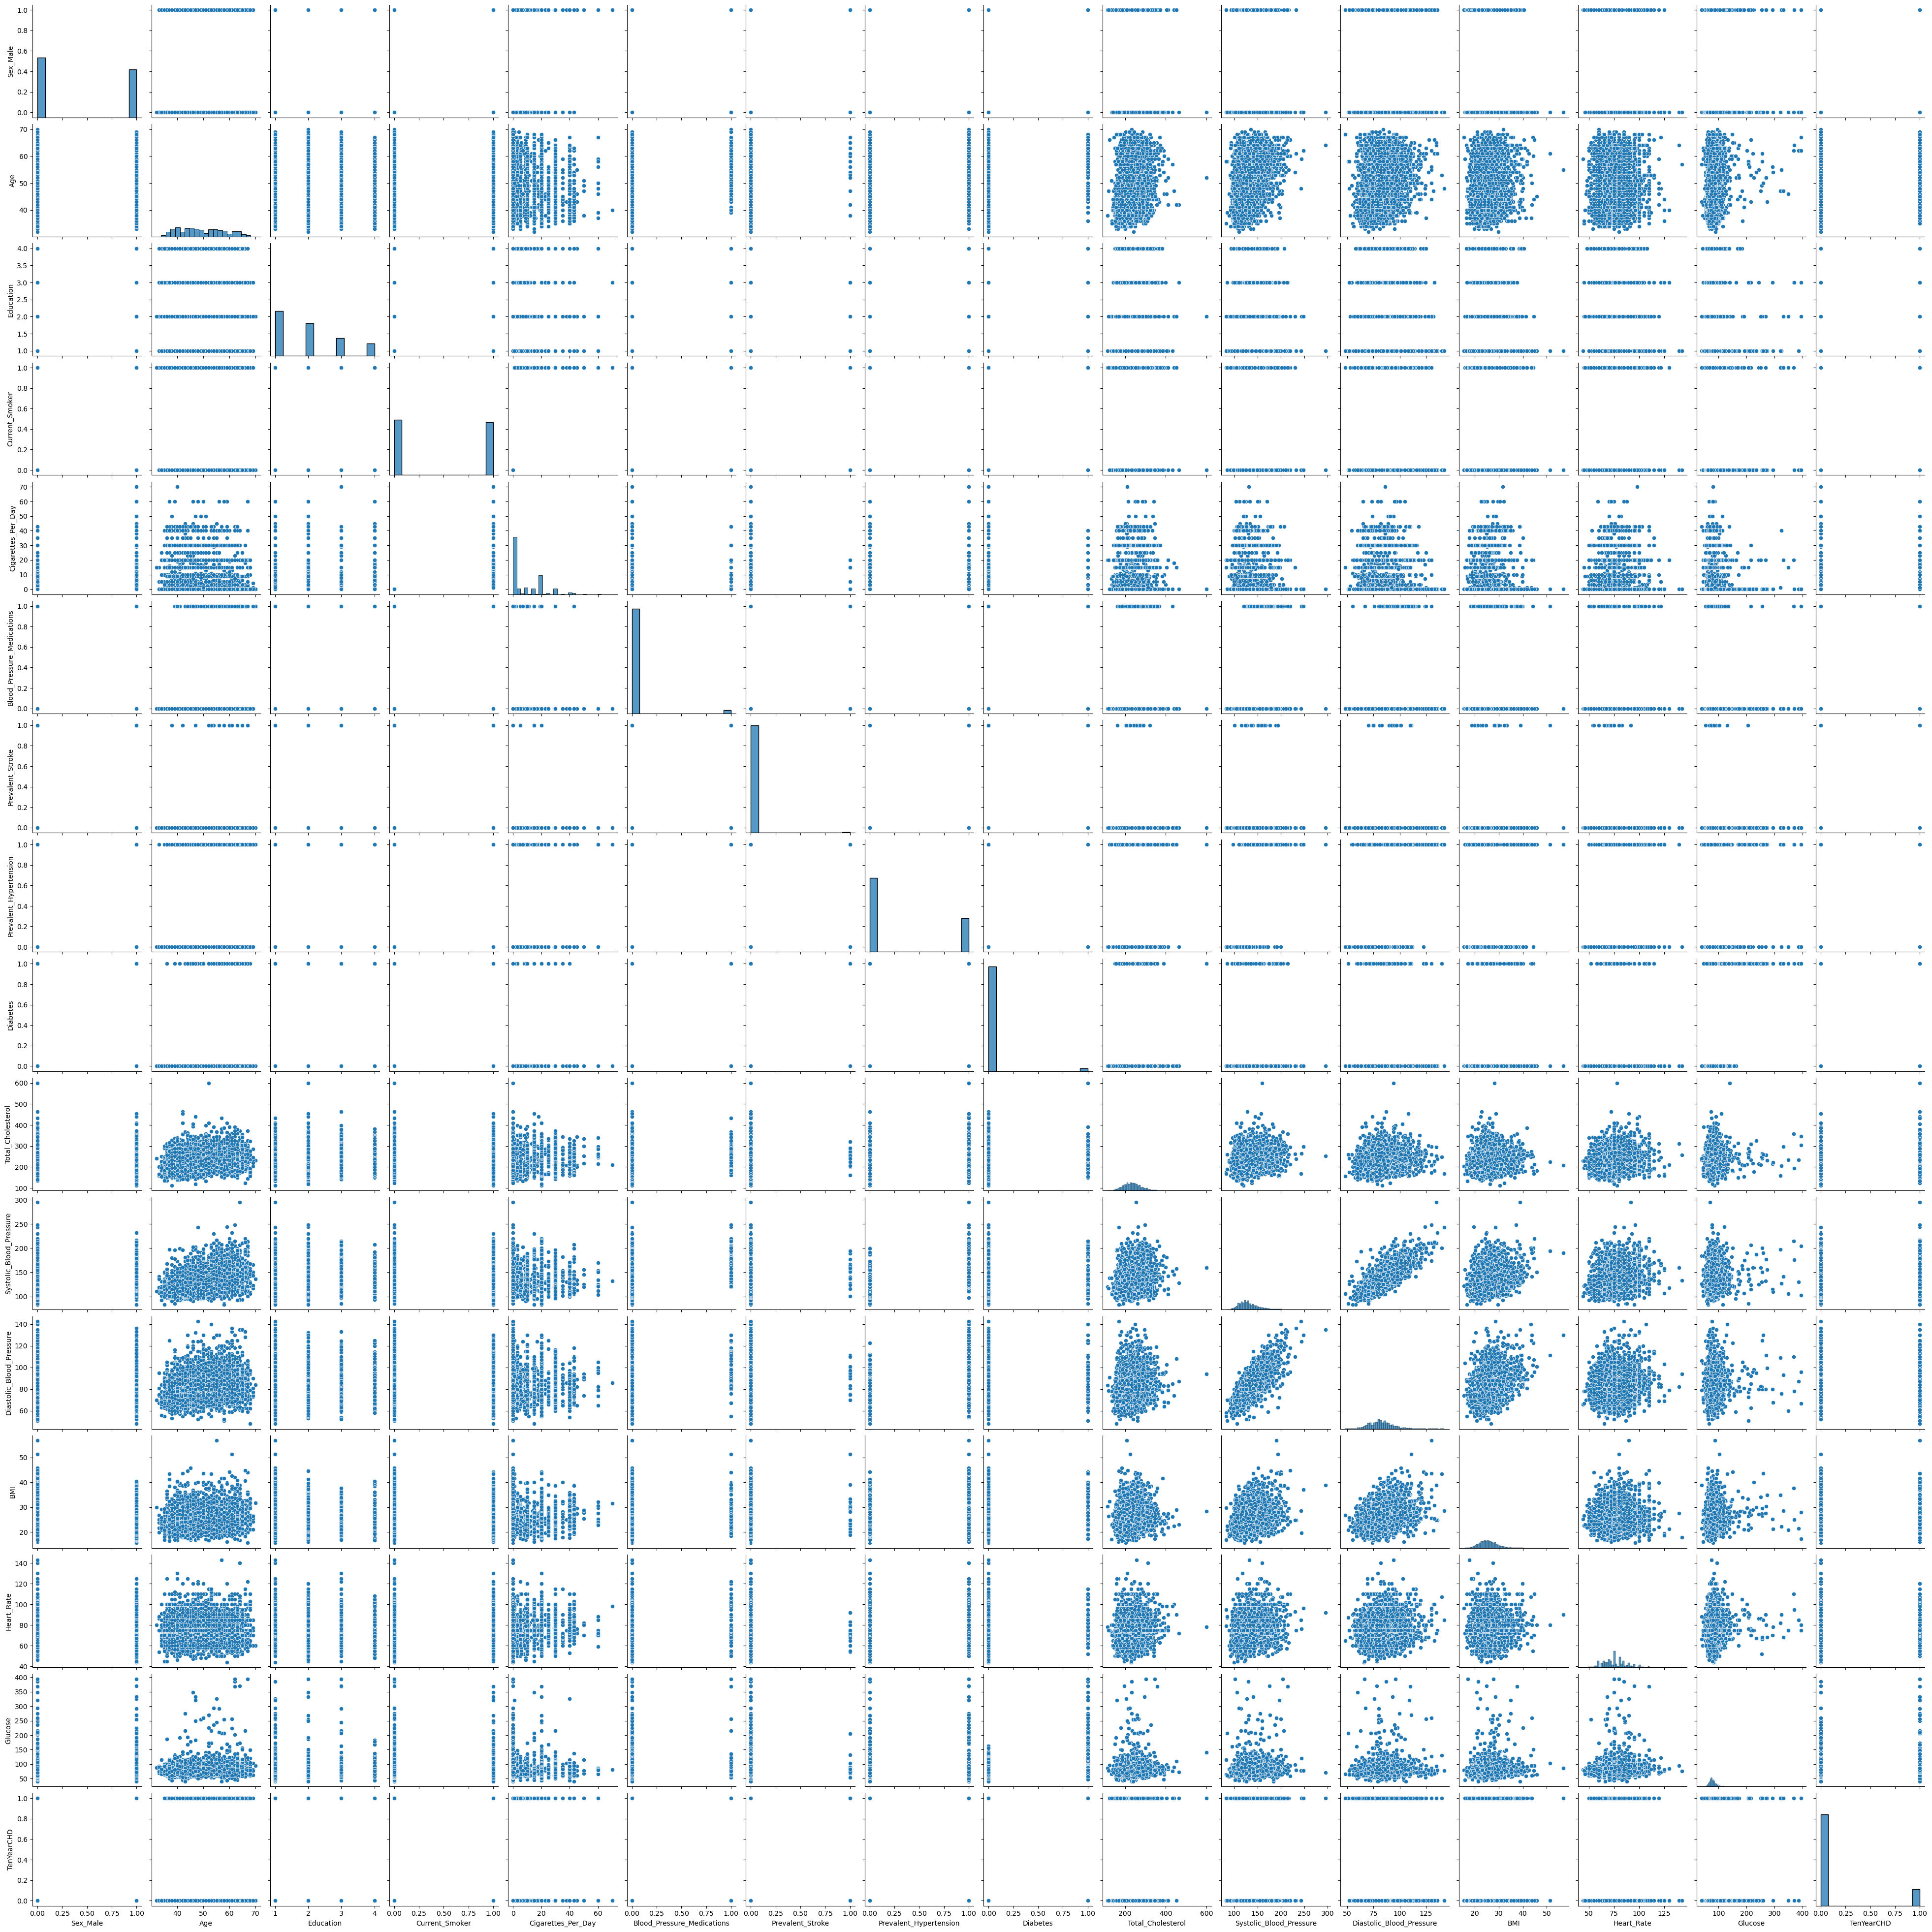

In [9]:
sn.pairplot(data=cvd_df)

In [10]:

cvd_df.describe()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
 # Define features set
X = cvd_df.copy()
X.drop("TenYearCHD", axis=1, inplace=True)
X.head()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85


In [12]:
 # Define target vector
y = cvd_df["TenYearCHD"].ravel()
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [13]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
 # Creating StandardScaler instance
scaler = StandardScaler()

In [15]:
 # Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [16]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 Fitting the Random Forest Model

In [18]:
 # Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [19]:
 # Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

Making Predictions Using the Random Forest Model

In [20]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

Model Evaluation

In [21]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
 # Displaying results
print("RF Confusion Matrix")
display(cm_df)
print(f"RF Accuracy Score : {acc_score}")
print("RF Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,769,6
Actual 1,136,4


Accuracy Score : 0.8448087431693989
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       775
           1       0.40      0.03      0.05       140

    accuracy                           0.84       915
   macro avg       0.62      0.51      0.48       915
weighted avg       0.78      0.84      0.78       915



In [23]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13339031982652996, 'Systolic_Blood_Pressure'),
 (0.12872809244092706, 'BMI'),
 (0.1281075071286606, 'Age'),
 (0.12223071749935507, 'Total_Cholesterol'),
 (0.12023574141818423, 'Glucose'),
 (0.11916232255516142, 'Diastolic_Blood_Pressure'),
 (0.09483738807752018, 'Heart_Rate'),
 (0.049212468693805106, 'Cigarettes_Per_Day'),
 (0.036432943412911326, 'Education'),
 (0.020878156908295694, 'Sex_Male'),
 (0.01772737060052536, 'Prevalent_Hypertension'),
 (0.012219808876814635, 'Current_Smoker'),
 (0.007709252451526337, 'Blood_Pressure_Medications'),
 (0.007057377916311747, 'Diabetes'),
 (0.002070532193471244, 'Prevalent_Stroke')]

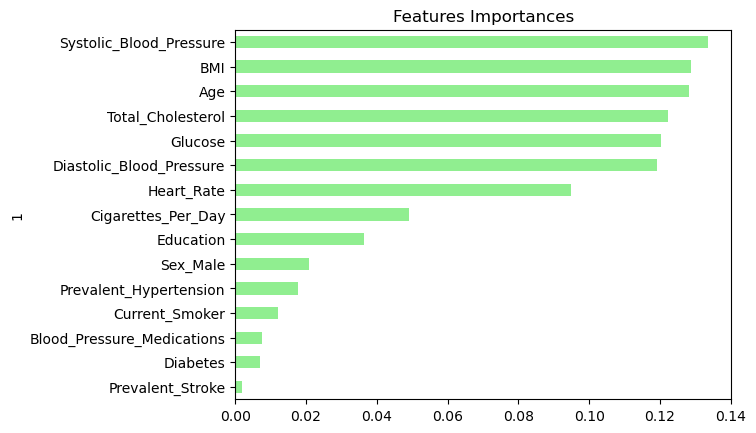

In [38]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
feature_importance = importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

feature_importance.get_figure().savefig('Output/feature_importance_plot.png')


Fitting the Decision Tree Model

In [39]:
# delete cell when restarting this kernel
from sklearn import tree

In [40]:
# Creating the decision tree classifier instance
dt_model = tree.DecisionTreeClassifier()

In [41]:
# Fitting the model
dt_model = dt_model.fit(X_train_scaled, y_train)

Making Predictions Using the Tree Model

In [42]:
# Making predictions using the testing data
predictions = dt_model.predict(X_test_scaled)

Model Evaluation

In [43]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [44]:
# Displaying results
print("DT Confusion Matrix")
display(cm_df)
print(f"DT Accuracy Score : {acc_score}")
print("DT Classification Report")
print(classification_report(y_test, predictions))

DT Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,647,128
Actual 1,98,42


DT Accuracy Score : 0.7530054644808744
DT Classification Report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       775
           1       0.25      0.30      0.27       140

    accuracy                           0.75       915
   macro avg       0.56      0.57      0.56       915
weighted avg       0.77      0.75      0.76       915



In [ ]:
# Needed for decision tree visualization delete when restarting kernel
import pydotplus
from IPython.display import Image